In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.listdir()

['.ipynb_checkpoints',
 'file',
 'coords.csv',
 'allcase_03022020.csv',
 'recovered_03022020.csv',
 'dead_03022020.csv',
 'allcase_04022020.csv',
 'recovered_04022020.csv',
 'dead_04022020.csv',
 'ETL_corona.ipynb',
 'literature.json',
 'Stat_corona.ipynb',
 'allcase_06022020.csv',
 'recovered_06022020.csv',
 'dead_06022020.csv',
 'allcase_08022020.csv',
 'recovered_08022020.csv',
 'dead_08022020.csv',
 'allcase_09022020.csv',
 'recovered_09022020.csv',
 'dead_09022020.csv',
 'conf.csv',
 'death.csv',
 'recover.csv',
 'allcase_11022020.csv',
 'recover_11022020.csv',
 'dead_11022020.csv',
 'Untitled.ipynb',
 'allcase_13022020.csv',
 'recover_13022020.csv',
 'dead_13022020.csv',
 'allcase_23022020.csv',
 'recover_23022020.csv',
 'dead_23022020.csv']

In [2]:
cases = pd.read_csv('allcase_23022020.csv')
cases.shape

(84, 34)

In [3]:
def colselect(df):
    '''
    returns a df with columns only with latest unique date
    cases: dataframe to clean up
    '''
    cols = []
    index = []
    print(df.shape)
    for i in df.columns.values[::-1]:
        if i.split(' ')[0] not in cols:
            cols.append(i.split(' ')[0])
            index.append(i)
    index.reverse()
    df = df.loc[:, index]
    index = list(df.columns.values)[:3]  + [i.split(' ')[0] for i in df.columns.values[2:]][1:]
    df.columns = index
    print(df.shape)
    return df

In [4]:
casescln = colselect(cases)

(84, 34)
(84, 34)


In [5]:
# add cases from news report
sumcases = pd.Series([1,27,44,59], index=['12/1/2019','12/31/2019','1/3/2020','1/5/2020']).append(casescln.sum())

In [6]:
sumcases.index = pd.to_datetime(sumcases.index.values)

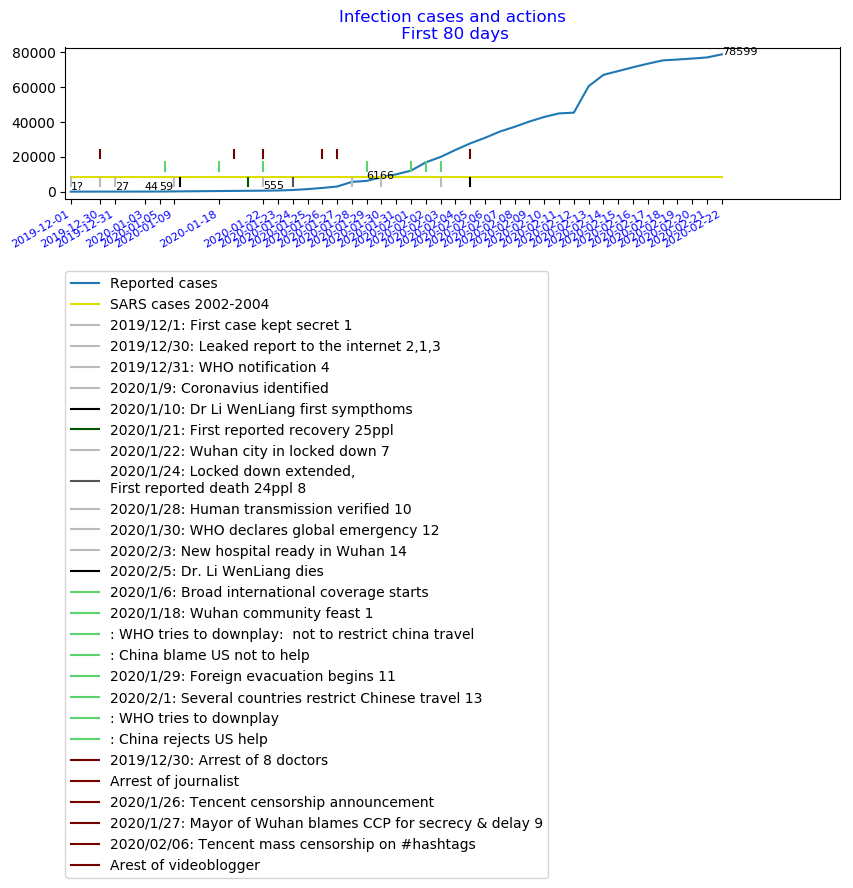

In [15]:
datechange = ['1/9/2020','1/12/2020','1/14/2020','1/15/2020']
#sqeeze the graph
sumindex = list(sumcases.index.date)
sumindex[:4] = pd.to_datetime(datechange).date

#extra dates for news {real: transformed}
dateextra={'12/30/2019':'1/11/2020',
           '1/9/2020':'1/16/2020',
          '1/18/2020':'1/19/2020',

          }
dateplus = list(pd.to_datetime(list(dateextra.keys())).date)
dateplusT = list(pd.to_datetime(list(dateextra.values())).date)
#select ticks
ticks = list(sumcases.index.date)
ticks[:4] = pd.to_datetime(datechange).date
ticks.extend(dateplusT)
ticks.sort()
#select label
label = list(sumcases.index.date)
label.extend(dateplus)
label.sort()

newscolor = '#bbbbbb'
hight = 8000
low = 3000

medical = [ [ '1/9/2020' , low , hight , newscolor , '2019/12/1: First case kept secret','1' ],
     [ '1/11/2020' , low , hight , newscolor , '2019/12/30: Leaked report to the internet' ,'2,1,3'],
     [ '1/12/2020' , low , hight , newscolor , '2019/12/31: WHO notification' ,'4'],   
     [ '1/16/2020' , low , hight , newscolor , '2020/1/9: Coronavius identified ',''],
     [ '1/16/2020 9:00', low, hight,'#000000','2020/1/10: Dr Li WenLiang first sympthoms',''],
     [ '1/21/2020' , low , hight , '#015400' , '2020/1/21: First reported recovery 25ppl' ,''],
     [ '1/22/2020' , low , hight , newscolor , '2020/1/22: Wuhan city in locked down' ,'7'],
     [ '1/24/2020' , low , hight , '#555555' , '2020/1/24: Locked down extended,\nFirst reported death 24ppl','8' ], 
     [ '1/28/2020' , low , hight , newscolor , '2020/1/28: Human transmission verified','10' ],      
     [ '1/30/2020' , low , hight , newscolor , '2020/1/30: WHO declares global emergency' ,'12'],      
     [ '2/3/2020' , low , hight , newscolor , '2020/2/3: New hospital ready in Wuhan','14' ],
     [ '2/5/2020', low, hight,'#000000','2020/2/5: Dr. Li WenLiang dies','']
          
          ]

socalc = '#5cd36f'
sochight = 12000
soclow = 17000
social = [
    [ '1/15/2020 9:00' , soclow , sochight , socalc , '2020/1/6: Broad international coverage starts','' ],
    [ '1/19/2020' , soclow , sochight , socalc , '2020/1/18: Wuhan community feast','1' ],
    [ '1/22/2020' , soclow , sochight , socalc , ': WHO tries to downplay:  not to restrict china travel ','' ],
    [ '2/1/2020' , soclow , sochight , socalc , ': China blame US not to help','' ],
    [ '1/29/2020' , soclow , sochight , socalc , '2020/1/29: Foreign evacuation begins' ,'11'],
    [ '2/1/2020' , soclow , sochight , socalc , '2020/2/1: Several countries restrict Chinese travel','13' ],
    [ '2/2/2020' , soclow , sochight , socalc , ': WHO tries to downplay ','' ],
    [ '2/3/2020' , soclow , sochight , socalc , ': China rejects US help','' ],
]

conheight =24000 
conlow =19000
concol = '#740000'

control = [
    ['1/11/2020',conlow,conheight,concol, '2019/12/30: Arrest of 8 doctors',''],
    ['1/20/2020',conlow,conheight,concol, 'Arrest of journalist',''],
    ['1/26/2020',conlow,conheight,concol, '2020/1/26: Tencent censorship announcement',''],
    ['1/27/2020' , conlow , conheight , concol , '2020/1/27: Mayor of Wuhan blames CCP for secrecy & delay','9' ],
    ['2/5/2020',conlow,conheight,concol, '2020/02/06: Tencent mass censorship on #hashtags',''],
    ['1/22/2020',conlow,conheight,concol, 'Arest of videoblogger',''],
    #['',conlow,conheight,concol, '',''],
    
]

texts = [('1/9/2020',900,'1?'),
        ('1/12/2020',1000,'27'),
        ('1/14/2020',1000,'44'),
        ('1/15/2020',1000,'59'),
        ('1/22/2020',sumcases['1/22/2020']+1200,int(sumcases['1/22/2020'])),
        ('1/29/2020',sumcases['1/29/2020']+1200,int(sumcases['1/29/2020'])),
        (sumcases.index[-1].date().strftime('%m/%d/%Y'),sumcases[-1],int(sumcases[-1]))]

fig, ax = plt.subplots(1,1, figsize=(10,2), dpi = 100)
ax.plot(sumindex, sumcases, label = 'Reported cases')
ax.plot(sumindex, [8096]*len(sumcases), c='#dddd00', label= 'SARS cases 2002-2004')

for i in medical:
    ax.plot((pd.to_datetime(i[0]),pd.to_datetime(i[0])),(i[1],i[2]), c = i[3], label = '{} {}'.format(i[4],i[5]))

for i in social:
    ax.plot((pd.to_datetime(i[0]),pd.to_datetime(i[0])),(i[1],i[2]), c = i[3], label = '{} {}'.format(i[4],i[5]))

for i in control:
    ax.plot((pd.to_datetime(i[0]),pd.to_datetime(i[0])),(i[1],i[2]), c = i[3], label = '{} {}'.format(i[4],i[5]))

    
for i in texts:
    ax.text(pd.to_datetime(i[0]),i[1],i[2], fontsize=8)
    

ax.set_xticks(ticks)
ax.set_xticklabels(label,rotation=30, horizontalalignment ='right', fontsize= 8, color='blue')
ax.set_title('Infection cases and actions\n First 80 days', color='blue')
plt.legend(loc = (0,-4.5))
plt.xlim(pd.to_datetime('1/8/2020 15:00'),pd.to_datetime('3/1/2020'))
plt.show()

- are we sure that the first death happened 55 days after the first case was identified?
- on 30/12/2019 the doctors talk in chatgroup about 7 patients and identified coronavirus RNA. on 31/12/2 there is 27 reported. are these numbers coming from other information isolated hospitals?
- how much could be the population real infetion if the original 7 and 27 was isolated still the desiese spreads?
- how the corrected curve looks like?

In [369]:
import json
with open('literature.json', 'r') as l:
    literature = json.load(l)

In [370]:
literature

{'03/02/2020': ['new hospital in 10 days, Hong Kong goverment refuse border closure',
  'https://www.dw.com/en/coronavirus-death-toll-overtakes-sars-epidemic/a-52235316'],
 '30/01/2020': ['Coronavirus: WHO declares global health emergency',
  'https://www.dw.com/en/coronavirus-who-declares-global-health-emergency/a-52209762'],
 '28/01/2020': ['Germany confirms human transmission of coronavirus',
  'https://www.dw.com/en/germany-confirms-human-transmission-of-coronavirus/a-52169007'],
 '24/01/2020': ['China extends lockdown on millions in coronavirus outbreak',
  'https://www.dw.com/en/china-extends-lockdown-on-millions-in-coronavirus-outbreak/a-52131828'],
 '22/01/2020': ['China locks down city at center of virus outbreak',
  'https://www.dw.com/en/china-locks-down-city-at-center-of-virus-outbreak/a-52103638'],
 '09/01/2020': ['New strain of coronavirus behind lung infections in China',
  'https://www.dw.com/en/new-strain-of-coronavirus-behind-lung-infections-in-china/a-51942489'],
 '3